**Reddit** is an American social news aggregation, web content rating, and discussion website. Registered members submit content to the site such as links, text posts, and images, which are then voted up or down by other members.

In [110]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [111]:
# Set format upto 2 decimal places
pd.options.display.float_format = "{:,.2f}".format

In [112]:
# load data
df = pd.read_csv(r'./data/Reddit.csv')

In [115]:
# check dimensions of data
nrows, ncols = df.shape
print(f"Dataset has {nrows} rows, {ncols} columns")

Dataset has 183891 rows, 12 columns


In [116]:
# check datatypes of columns
df.dtypes

id                        object
title                     object
score                      int64
author                    object
author_flair_text         object
removed_by                object
total_awards_received    float64
awarders                  object
created_utc                int64
full_link                 object
num_comments               int64
over_18                     bool
dtype: object

In [117]:
# Glance first few records
df.head(n = 3)

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,hbyv2e,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,NaN,NaN,0.00,[],1592565317,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,hbynoy,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,NaN,NaN,0.00,[],1592564316,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
2,hbym2y,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,NaN,NaN,0.00,[],1592564089,https://www.reddit.com/r/dataisbeautiful/comme...,1,False


In [118]:
# Check % of missing data
np.round((df.isna().sum()/df.shape[0])*100,0)

id                       0.00
title                    0.00
score                    0.00
author                   0.00
author_flair_text       87.00
removed_by              94.00
total_awards_received   76.00
awarders                82.00
created_utc              0.00
full_link                0.00
num_comments             0.00
over_18                  0.00
dtype: float64

* Columns author_flair_text, removed_by, total_awards_received, awarders  having high % of  null values
* Before we drop these columns, lets find top 5 values of these columns

In [119]:
# top 3 values of author_flair_text

df['author_flair_text'].value_counts().iloc[:3]

OC: 1               8090
OC: 2               3004
Viz Practitioner    2045
Name: author_flair_text, dtype: int64

In [121]:
# top 3 values of removed_by

df['removed_by'].value_counts().iloc[:3]

moderator           8030
deleted             1714
automod_filtered     960
Name: removed_by, dtype: int64

In [125]:
# top 3 frequent values of total_awards_received

df['total_awards_received'].value_counts().iloc[:3]

0.00    43941
1.00       38
2.00        8
Name: total_awards_received, dtype: int64

In [126]:
# top 3 frequest values of awarders

df['awarders'].value_counts().iloc[:3]

[]                     33331
['stompstumpstamp']        1
Name: awarders, dtype: int64

<b> Dropping columns </b>

In [127]:
df.drop(['author_flair_text', 'removed_by', 'total_awards_received', 'awarders'], axis=1, inplace=True)

In [128]:
# Check if we still have any missing values
df.isna().sum()

id              0
title           1
score           0
author          0
created_utc     0
full_link       0
num_comments    0
over_18         0
dtype: int64

In [129]:
# lets drop 1 row which has missing values 
df = df.dropna(axis=0, how='any')

In [130]:
df.isna().sum()

id              0
title           0
score           0
author          0
created_utc     0
full_link       0
num_comments    0
over_18         0
dtype: int64

In [134]:
# check if id is quieue
len(df) == len(df.id)

True

In [136]:
# Since id is a unique column , so lets make it as index of df
df.set_index('id', inplace = True)

In [137]:
# glance at dataset 
df.head(n = 3)

,title,score,author,created_utc,full_link,num_comments,over_18
id,,,,,,,
hbyv2e,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,1592565317,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
hbynoy,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,1592564316,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
hbym2y,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,1592564089,https://www.reddit.com/r/dataisbeautiful/comme...,1,False


**Let's start with `author` column**

In [142]:
# top 5 authores in terms of number of rows/recs/datapoints
df.groupby('author').size().sort_values(ascending=False).head(5)

author
[deleted]     28596
jimrosenz      2293
OverflowDs      484
RAGTIMEMA       325
rhiever         323
dtype: int64

As there are author, that are given name as "[deleted]", so i will drop those recs, so we have only those recs with valid author names

In [144]:
# Delete records based on index of recs where authore name is '[deleted]'
df.drop(index = df.index[df['author'] == '[deleted]'], inplace=True)

In [145]:
# check dimensions of data
nrows, ncols = df.shape
print(f"Dataset has {nrows} rows, {ncols} columns")

Dataset has 155294 rows, 7 columns


In [147]:
# set author and title columns as upper case , to avoid dups due to case mismatch

df.title = df.title.str.upper()
df.author = df.author.str.upper()

<b>Top 5 authors who made a post</b>

In [150]:
top5_auth_by_posts = df.groupby('author').size().sort_values(ascending = False).head(5)
print(top5_auth_by_posts)

author
JIMROSENZ     2293
OVERFLOWDS     484
RAGTIMEMA      325
RHIEVER        323
CAOBANLONG     314
dtype: int64


In [170]:
def draw_barplot(S, xlab, ylab, plot_title):
    fig, ax = plt.subplots()
    ax = sns.barplot(y = S.index, x = S.values)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(plot_title)
    plt.tight_layout()
    plt.show()
    
    return

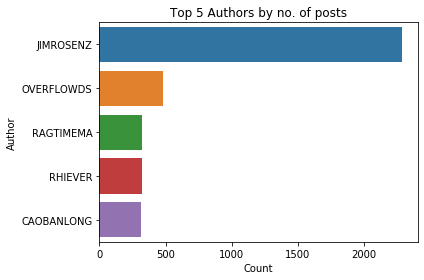

In [173]:
draw_barplot(top5_auth_by_posts, ylab = 'Author', xlab='Count', 
             plot_title='Top 5 Authors by no. of posts')

<b>Top 5 Titles by sum of score</b>

In [175]:
# Title by score
top5_titles_by_score = df.groupby('title').agg({'score':'sum'}).\
                            reset_index().\
                            sort_values('score', ascending=False).\
                            head(5)

# convert scale of score to thousands
top5_titles_by_score['score'] = top5_titles_by_score['score'] / 1000

# rename column
top5_titles_by_score.rename(columns = {'score': 'score_K'}, inplace = True)

print(top5_titles_by_score)

                                                   title  score_K
29269                                           DATA_IRL   733.19
55864  IMAGINE HAVING TO PAY MONEY TO SHARE YOUR DATA...   116.23
62597  LET'S HEAR IT FOR THE LURKERS! THE VAST MAJORI...   105.25
20856  CAUSE OF DEATH - REALITY VS. GOOGLE VS. MEDIA ...   101.45
40371  GAZE AND FOOT PLACEMENT WHEN WALKING OVER ROUG...    99.61


In [176]:
# Create a series for top 5 titles

S = pd.Series(data = top5_titles_by_score['score_K'].values, 
              index = top5_titles_by_score.title)

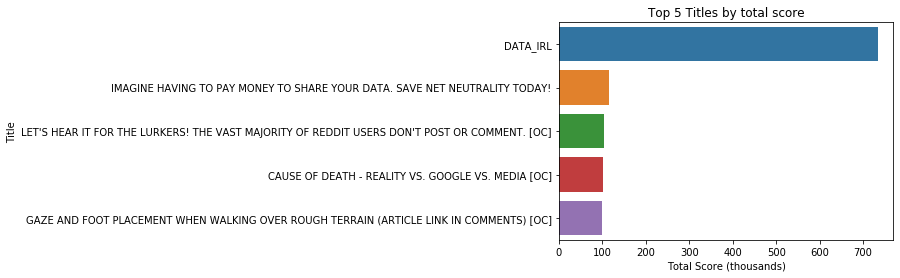

In [177]:
draw_barplot(S, ylab = 'Title', xlab='Total Score (thousands)', 
             plot_title='Top 5 Titles by total score')

In [179]:
# posts with upto 30 votes i.e. score

np.round(sum(df['score'] <= 30)/len(df) * 100, 0)

90.0

<b> Top 5 titles based on number of comments </b>

In [200]:
top5_titles_by_numofcomments = df.groupby('title').agg({'num_comments':'sum'}).\
                                reset_index().sort_values('num_comments', ascending = False).\
                                head(5)
# comments in thousands
top5_titles_by_numofcomments['num_comments'] = top5_titles_by_numofcomments['num_comments'] /1000

# rename column
top5_titles_by_numofcomments.rename(columns = {'num_comments': 'num_comments_K'}, inplace=True)


print(top5_titles_by_numofcomments)                                                                                   

                                                    title  num_comments_K
29269                                            DATA_IRL           60.32
81668             POLICE KILLING RATES IN G7 MEMBERS [OC]           10.43
68151   MILLENNIAL HOME OWNERSHIP SHRINKS AS STUDENT D...            9.79
124609  WORST EPISODE EVER? THE MOST COMMONLY RATED SH...            9.18
120066               WHAT'S GETTING CUT IN TRUMP'S BUDGET            8.77


In [201]:
# Create a series for top 5 titles by sum of num_of_comments

S = pd.Series(data = top5_titles_by_numofcomments['num_comments_K'].values,
             index = top5_titles_by_numofcomments.title)

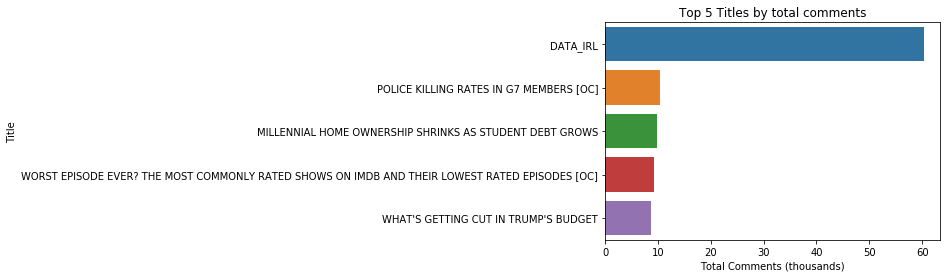

In [202]:
draw_barplot(S, ylab = 'Title', xlab='Total Comments (thousands)', 
             plot_title='Top 5 Titles by total comments')

<b> Convert created_utc into date time format </b>

In [204]:
df['created'] = pd.to_datetime(df['created_utc'], unit='s')

In [207]:
min(df['created'])

Timestamp('2012-02-14 23:50:56')

In [208]:
max(df['created'])

Timestamp('2020-06-19 11:15:17')

In [214]:
# No. of posts on daily basis
S = df.groupby(df['created'].dt.date).size()

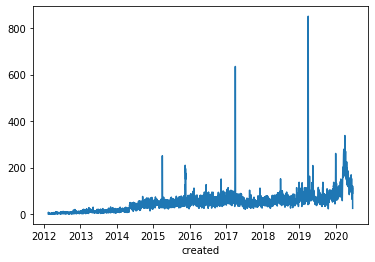

In [223]:
sns.lineplot(S.index, S.values)
plt.show()

In [227]:
# top 5 dates based on no. of posts
S.sort_values(ascending = False).head(5)

created
2019-04-01    851
2017-04-01    635
2020-04-02    338
2020-03-22    279
2020-04-01    276
dtype: int64

In [229]:
# Over_18 , what percent of data is over_18
(df.groupby('over_18').size()/len(df)) * 100

over_18
False   99.51
True     0.49
dtype: float64

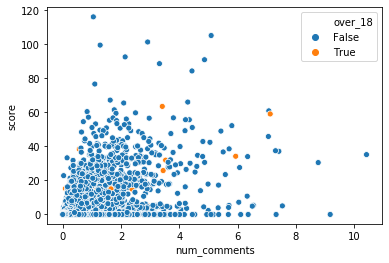

In [238]:
sns.scatterplot(x = df['num_comments']/1000, y=df['score']/1000, data = df[df.num_comments < 18801],
               hue = 'over_18')